Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score


# Q1

# Part A

In [2]:
data = pd.read_csv('Fire.csv')
data.head(5)

,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,...,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax,FireAlarm
0,Melbourne,NaN,NaN,NaN,2.6,4.2,SW,43.0,SW,S,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Darwin,26.7,32.0,3.6,8.0,3.0,W,39.0,W,WNW,...,22.0,75.0,72.0,1007.6,1005.4,6.0,7.0,29.4,29.9,No
2,WaggaWagga,15.0,29.3,NaN,NaN,NaN,WNW,61.0,NNE,W,...,33.0,78.0,17.0,1007.8,1007.4,1.0,NaN,21.6,28.6,NaN
3,Townsville,24.0,30.0,4.0,8.0,NaN,ENE,61.0,ESE,E,...,13.0,77.0,77.0,1010.1,1007.2,8.0,7.0,29.0,29.0,Yes
4,Wollongong,21.5,22.2,0.2,NaN,NaN,N,50.0,SE,SW,...,13.0,86.0,93.0,1011.7,1010.5,8.0,8.0,22.1,19.3,Yes


In [3]:
data.isnull().sum()

Home-Loc                       0
HumidityMin                  688
HumidityMax                  586
TVOC                        1571
eCO2                       30064
N2ppm                      33483
SteamDir                    4880
SteamSpeed                  4853
RedLightDir1                5125
RedLightDir2                1973
H2-Sensor1                   838
H2-Sensor2                  1402
H2-Sensor3                  1289
H2-Sensor4                  2117
Visibility-Left-Sensor      7218
Visibility-Right-Sensor     7184
Cloud9am                   26834
Cloud3pm                   28561
TempMin                      855
TempMax                     1677
FireAlarm                   1549
dtype: int64

In [4]:
data.mean()

C:\Users\KASHANI\AppData\Local\Temp\ipykernel_2140\4080730010.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


HumidityMin                  12.183320
HumidityMax                  23.216552
TVOC                          2.307843
eCO2                          5.455893
N2ppm                         7.606216
SteamSpeed                   39.960274
H2-Sensor1                   13.998814
H2-Sensor2                   18.654023
H2-Sensor3                   68.833983
H2-Sensor4                   51.539613
Visibility-Left-Sensor     1017.662098
Visibility-Right-Sensor    1015.267384
Cloud9am                      4.437415
Cloud3pm                      4.504730
TempMin                      16.988293
TempMax                      21.678913
dtype: float64

In [5]:
data = data.fillna(data.mean())
data.head(5)

C:\Users\KASHANI\AppData\Local\Temp\ipykernel_2140\3385502392.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,...,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax,FireAlarm
0,Melbourne,12.18332,23.216552,2.307843,2.600000,4.200000,SW,43.0,SW,S,...,15.0,68.833983,51.539613,1017.662098,1015.267384,4.437415,4.50473,16.988293,21.678913,NaN
1,Darwin,26.70000,32.000000,3.600000,8.000000,3.000000,W,39.0,W,WNW,...,22.0,75.000000,72.000000,1007.600000,1005.400000,6.000000,7.00000,29.400000,29.900000,No
2,WaggaWagga,15.00000,29.300000,2.307843,5.455893,7.606216,WNW,61.0,NNE,W,...,33.0,78.000000,17.000000,1007.800000,1007.400000,1.000000,4.50473,21.600000,28.600000,NaN
3,Townsville,24.00000,30.000000,4.000000,8.000000,7.606216,ENE,61.0,ESE,E,...,13.0,77.000000,77.000000,1010.100000,1007.200000,8.000000,7.00000,29.000000,29.000000,Yes
4,Wollongong,21.50000,22.200000,0.200000,5.455893,7.606216,N,50.0,SE,SW,...,13.0,86.000000,93.000000,1011.700000,1010.500000,8.000000,8.00000,22.100000,19.300000,Yes


In [6]:
data.isnull().sum()

Home-Loc                      0
HumidityMin                   0
HumidityMax                   0
TVOC                          0
eCO2                          0
N2ppm                         0
SteamDir                   4880
SteamSpeed                    0
RedLightDir1               5125
RedLightDir2               1973
H2-Sensor1                    0
H2-Sensor2                    0
H2-Sensor3                    0
H2-Sensor4                    0
Visibility-Left-Sensor        0
Visibility-Right-Sensor       0
Cloud9am                      0
Cloud3pm                      0
TempMin                       0
TempMax                       0
FireAlarm                  1549
dtype: int64

In [7]:
data = data.fillna(data[['SteamDir', 'RedLightDir1', 'RedLightDir2', 'FireAlarm']].mode().iloc[0])

In [8]:
data.head(5)

,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,...,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax,FireAlarm
0,Melbourne,12.18332,23.216552,2.307843,2.600000,4.200000,SW,43.0,SW,S,...,15.0,68.833983,51.539613,1017.662098,1015.267384,4.437415,4.50473,16.988293,21.678913,No
1,Darwin,26.70000,32.000000,3.600000,8.000000,3.000000,W,39.0,W,WNW,...,22.0,75.000000,72.000000,1007.600000,1005.400000,6.000000,7.00000,29.400000,29.900000,No
2,WaggaWagga,15.00000,29.300000,2.307843,5.455893,7.606216,WNW,61.0,NNE,W,...,33.0,78.000000,17.000000,1007.800000,1007.400000,1.000000,4.50473,21.600000,28.600000,No
3,Townsville,24.00000,30.000000,4.000000,8.000000,7.606216,ENE,61.0,ESE,E,...,13.0,77.000000,77.000000,1010.100000,1007.200000,8.000000,7.00000,29.000000,29.000000,Yes
4,Wollongong,21.50000,22.200000,0.200000,5.455893,7.606216,N,50.0,SE,SW,...,13.0,86.000000,93.000000,1011.700000,1010.500000,8.000000,8.00000,22.100000,19.300000,Yes


In [9]:
data.isnull().sum()

Home-Loc                   0
HumidityMin                0
HumidityMax                0
TVOC                       0
eCO2                       0
N2ppm                      0
SteamDir                   0
SteamSpeed                 0
RedLightDir1               0
RedLightDir2               0
H2-Sensor1                 0
H2-Sensor2                 0
H2-Sensor3                 0
H2-Sensor4                 0
Visibility-Left-Sensor     0
Visibility-Right-Sensor    0
Cloud9am                   0
Cloud3pm                   0
TempMin                    0
TempMax                    0
FireAlarm                  0
dtype: int64

Q1 is completed successfully

# Part B

In [10]:
data

,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,...,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax,FireAlarm
0,Melbourne,12.18332,23.216552,2.307843,2.600000,4.200000,SW,43.000000,SW,S,...,15.0,68.833983,51.539613,1017.662098,1015.267384,4.437415,4.50473,16.988293,21.678913,No
1,Darwin,26.70000,32.000000,3.600000,8.000000,3.000000,W,39.000000,W,WNW,...,22.0,75.000000,72.000000,1007.600000,1005.400000,6.000000,7.00000,29.400000,29.900000,No
2,WaggaWagga,15.00000,29.300000,2.307843,5.455893,7.606216,WNW,61.000000,NNE,W,...,33.0,78.000000,17.000000,1007.800000,1007.400000,1.000000,4.50473,21.600000,28.600000,No
3,Townsville,24.00000,30.000000,4.000000,8.000000,7.606216,ENE,61.000000,ESE,E,...,13.0,77.000000,77.000000,1010.100000,1007.200000,8.000000,7.00000,29.000000,29.000000,Yes
4,Wollongong,21.50000,22.200000,0.200000,5.455893,7.606216,N,50.000000,SE,SW,...,13.0,86.000000,93.000000,1011.700000,1010.500000,8.000000,8.00000,22.100000,19.300000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,Sale,8.20000,16.800000,6.400000,2.200000,2.400000,W,57.000000,NW,WNW,...,22.0,55.000000,68.000000,1010.300000,1010.100000,5.000000,8.00000,15.200000,15.100000,Yes
69995,Williamtown,7.50000,17.500000,0.000000,6.400000,10.800000,WNW,41.000000,WNW,SSE,...,19.0,57.000000,39.000000,1021.900000,1022.100000,1.000000,2.00000,12.700000,15.800000,No
69996,AliceSprings,26.80000,38.900000,0.000000,11.200000,6.000000,N,69.000000,E,SW,...,35.0,21.000000,58.000000,1006.300000,1003.500000,6.000000,8.00000,33.500000,27.500000,Yes
69997,Brisbane,16.60000,27.900000,8.400000,0.000000,8.700000,W,39.960274,SW,SW,...,2.0,83.000000,49.000000,1016.800000,1013.300000,1.000000,3.00000,20.400000,27.200000,No


In [11]:
df = data.drop(['Home-Loc', 'SteamDir', 'RedLightDir1', 'RedLightDir2', 'FireAlarm'], axis=1)
df

,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamSpeed,H2-Sensor1,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax
0,12.18332,23.216552,2.307843,2.600000,4.200000,43.000000,24.0,15.0,68.833983,51.539613,1017.662098,1015.267384,4.437415,4.50473,16.988293,21.678913
1,26.70000,32.000000,3.600000,8.000000,3.000000,39.000000,22.0,22.0,75.000000,72.000000,1007.600000,1005.400000,6.000000,7.00000,29.400000,29.900000
2,15.00000,29.300000,2.307843,5.455893,7.606216,61.000000,9.0,33.0,78.000000,17.000000,1007.800000,1007.400000,1.000000,4.50473,21.600000,28.600000
3,24.00000,30.000000,4.000000,8.000000,7.606216,61.000000,11.0,13.0,77.000000,77.000000,1010.100000,1007.200000,8.000000,7.00000,29.000000,29.000000
4,21.50000,22.200000,0.200000,5.455893,7.606216,50.000000,19.0,13.0,86.000000,93.000000,1011.700000,1010.500000,8.000000,8.00000,22.100000,19.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,8.20000,16.800000,6.400000,2.200000,2.400000,57.000000,30.0,22.0,55.000000,68.000000,1010.300000,1010.100000,5.000000,8.00000,15.200000,15.100000
69995,7.50000,17.500000,0.000000,6.400000,10.800000,41.000000,24.0,19.0,57.000000,39.000000,1021.900000,1022.100000,1.000000,2.00000,12.700000,15.800000
69996,26.80000,38.900000,0.000000,11.200000,6.000000,69.000000,20.0,35.0,21.000000,58.000000,1006.300000,1003.500000,6.000000,8.00000,33.500000,27.500000
69997,16.60000,27.900000,8.400000,0.000000,8.700000,39.960274,4.0,2.0,83.000000,49.000000,1016.800000,1013.300000,1.000000,3.00000,20.400000,27.200000


In [12]:
df.max()

HumidityMin                  31.8
HumidityMax                  47.3
TVOC                        268.6
eCO2                         86.2
N2ppm                        14.3
SteamSpeed                  135.0
H2-Sensor1                  130.0
H2-Sensor2                   83.0
H2-Sensor3                  100.0
H2-Sensor4                  100.0
Visibility-Left-Sensor     1040.9
Visibility-Right-Sensor    1039.6
Cloud9am                      8.0
Cloud3pm                      9.0
TempMin                      39.0
TempMax                      46.1
dtype: float64

In [13]:
col_ranges = df.max() - df.min()
col_ranges

HumidityMin                 40.3
HumidityMax                 52.1
TVOC                       268.6
eCO2                        86.2
N2ppm                       14.3
SteamSpeed                 128.0
H2-Sensor1                 130.0
H2-Sensor2                  83.0
H2-Sensor3                 100.0
H2-Sensor4                 100.0
Visibility-Left-Sensor      60.4
Visibility-Right-Sensor     60.6
Cloud9am                     8.0
Cloud3pm                     9.0
TempMin                     46.2
TempMax                     51.5
dtype: float64

In [14]:
cols_to_norm = ['HumidityMin', 'HumidityMax', 'TVOC', 'eCO2', 'N2ppm', 'SteamSpeed', 'H2-Sensor1', 'H2-Sensor2',
                'H2-Sensor3', 'H2-Sensor4', 'Visibility-Left-Sensor', 'Visibility-Right-Sensor', 'Cloud9am', 'Cloud3pm',
                'TempMin', 'TempMax']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [15]:
data

,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,...,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax,FireAlarm
0,Melbourne,0.513234,0.537746,0.008592,0.030162,0.293706,SW,0.281250,SW,S,...,0.180723,0.68834,0.515396,0.615267,0.598472,0.554677,0.500526,0.523556,0.525804,No
1,Darwin,0.873449,0.706334,0.013403,0.092807,0.209790,W,0.250000,W,WNW,...,0.265060,0.75000,0.720000,0.448675,0.435644,0.750000,0.777778,0.792208,0.685437,No
2,WaggaWagga,0.583127,0.654511,0.008592,0.063293,0.531903,WNW,0.421875,NNE,W,...,0.397590,0.78000,0.170000,0.451987,0.468647,0.125000,0.500526,0.623377,0.660194,No
3,Townsville,0.806452,0.667946,0.014892,0.092807,0.531903,ENE,0.421875,ESE,E,...,0.156627,0.77000,0.770000,0.490066,0.465347,1.000000,0.777778,0.783550,0.667961,Yes
4,Wollongong,0.744417,0.518234,0.000745,0.063293,0.531903,N,0.335938,SE,SW,...,0.156627,0.86000,0.930000,0.516556,0.519802,1.000000,0.888889,0.634199,0.479612,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,Sale,0.414392,0.414587,0.023827,0.025522,0.167832,W,0.390625,NW,WNW,...,0.265060,0.55000,0.680000,0.493377,0.513201,0.625000,0.888889,0.484848,0.398058,Yes
69995,Williamtown,0.397022,0.428023,0.000000,0.074246,0.755245,WNW,0.265625,WNW,SSE,...,0.228916,0.57000,0.390000,0.685430,0.711221,0.125000,0.222222,0.430736,0.411650,No
69996,AliceSprings,0.875931,0.838772,0.000000,0.129930,0.419580,N,0.484375,E,SW,...,0.421687,0.21000,0.580000,0.427152,0.404290,0.750000,0.888889,0.880952,0.638835,Yes
69997,Brisbane,0.622829,0.627639,0.031273,0.000000,0.608392,W,0.257502,SW,SW,...,0.024096,0.83000,0.490000,0.600993,0.566007,0.125000,0.333333,0.597403,0.633010,No


# Part c

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [17]:
data.nunique()

Home-Loc                    49
HumidityMin                383
HumidityMax                496
TVOC                       540
eCO2                       294
N2ppm                      145
SteamDir                    16
SteamSpeed                  63
RedLightDir1                16
RedLightDir2                16
H2-Sensor1                  44
H2-Sensor2                  43
H2-Sensor3                 102
H2-Sensor4                 102
Visibility-Left-Sensor     529
Visibility-Right-Sensor    527
Cloud9am                    10
Cloud3pm                    11
TempMin                    431
TempMax                    487
FireAlarm                    2
dtype: int64

In [18]:
data[['Home-Loc', 'SteamDir', 'RedLightDir1', 'RedLightDir2', 'FireAlarm']] = data[
    ['Home-Loc', 'SteamDir', 'RedLightDir1', 'RedLightDir2', 'FireAlarm']].apply(LabelEncoder().fit_transform)
data

,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,...,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax,FireAlarm
0,18,0.513234,0.537746,0.008592,0.030162,0.293706,12,0.281250,12,8,...,0.180723,0.68834,0.515396,0.615267,0.598472,0.554677,0.500526,0.523556,0.525804,0
1,13,0.873449,0.706334,0.013403,0.092807,0.209790,13,0.250000,13,14,...,0.265060,0.75000,0.720000,0.448675,0.435644,0.750000,0.777778,0.792208,0.685437,0
2,42,0.583127,0.654511,0.008592,0.063293,0.531903,14,0.421875,5,13,...,0.397590,0.78000,0.170000,0.451987,0.468647,0.125000,0.500526,0.623377,0.660194,0
3,39,0.806452,0.667946,0.014892,0.092807,0.531903,1,0.421875,2,0,...,0.156627,0.77000,0.770000,0.490066,0.465347,1.000000,0.777778,0.783550,0.667961,1
4,47,0.744417,0.518234,0.000745,0.063293,0.531903,3,0.335938,9,12,...,0.156627,0.86000,0.930000,0.516556,0.519802,1.000000,0.888889,0.634199,0.479612,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,35,0.414392,0.414587,0.023827,0.025522,0.167832,13,0.390625,7,14,...,0.265060,0.55000,0.680000,0.493377,0.513201,0.625000,0.888889,0.484848,0.398058,1
69995,45,0.397022,0.428023,0.000000,0.074246,0.755245,14,0.265625,14,10,...,0.228916,0.57000,0.390000,0.685430,0.711221,0.125000,0.222222,0.430736,0.411650,0
69996,3,0.875931,0.838772,0.000000,0.129930,0.419580,3,0.484375,0,12,...,0.421687,0.21000,0.580000,0.427152,0.404290,0.750000,0.888889,0.880952,0.638835,1
69997,7,0.622829,0.627639,0.031273,0.000000,0.608392,13,0.257502,12,12,...,0.024096,0.83000,0.490000,0.600993,0.566007,0.125000,0.333333,0.597403,0.633010,0


In [19]:
data.nunique()

Home-Loc                    49
HumidityMin                383
HumidityMax                496
TVOC                       540
eCO2                       294
N2ppm                      145
SteamDir                    16
SteamSpeed                  63
RedLightDir1                16
RedLightDir2                16
H2-Sensor1                  44
H2-Sensor2                  43
H2-Sensor3                 102
H2-Sensor4                 102
Visibility-Left-Sensor     529
Visibility-Right-Sensor    527
Cloud9am                    10
Cloud3pm                    11
TempMin                    431
TempMax                    487
FireAlarm                    2
dtype: int64

# Part d

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math

In [21]:
data_y = data['FireAlarm']
date_x = data.drop(columns=['FireAlarm'], axis=0)

In [22]:
date_x

,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,H2-Sensor1,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax
0,18,0.513234,0.537746,0.008592,0.030162,0.293706,12,0.281250,12,8,0.184615,0.180723,0.68834,0.515396,0.615267,0.598472,0.554677,0.500526,0.523556,0.525804
1,13,0.873449,0.706334,0.013403,0.092807,0.209790,13,0.250000,13,14,0.169231,0.265060,0.75000,0.720000,0.448675,0.435644,0.750000,0.777778,0.792208,0.685437
2,42,0.583127,0.654511,0.008592,0.063293,0.531903,14,0.421875,5,13,0.069231,0.397590,0.78000,0.170000,0.451987,0.468647,0.125000,0.500526,0.623377,0.660194
3,39,0.806452,0.667946,0.014892,0.092807,0.531903,1,0.421875,2,0,0.084615,0.156627,0.77000,0.770000,0.490066,0.465347,1.000000,0.777778,0.783550,0.667961
4,47,0.744417,0.518234,0.000745,0.063293,0.531903,3,0.335938,9,12,0.146154,0.156627,0.86000,0.930000,0.516556,0.519802,1.000000,0.888889,0.634199,0.479612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,35,0.414392,0.414587,0.023827,0.025522,0.167832,13,0.390625,7,14,0.230769,0.265060,0.55000,0.680000,0.493377,0.513201,0.625000,0.888889,0.484848,0.398058
69995,45,0.397022,0.428023,0.000000,0.074246,0.755245,14,0.265625,14,10,0.184615,0.228916,0.57000,0.390000,0.685430,0.711221,0.125000,0.222222,0.430736,0.411650
69996,3,0.875931,0.838772,0.000000,0.129930,0.419580,3,0.484375,0,12,0.153846,0.421687,0.21000,0.580000,0.427152,0.404290,0.750000,0.888889,0.880952,0.638835
69997,7,0.622829,0.627639,0.031273,0.000000,0.608392,13,0.257502,12,12,0.030769,0.024096,0.83000,0.490000,0.600993,0.566007,0.125000,0.333333,0.597403,0.633010


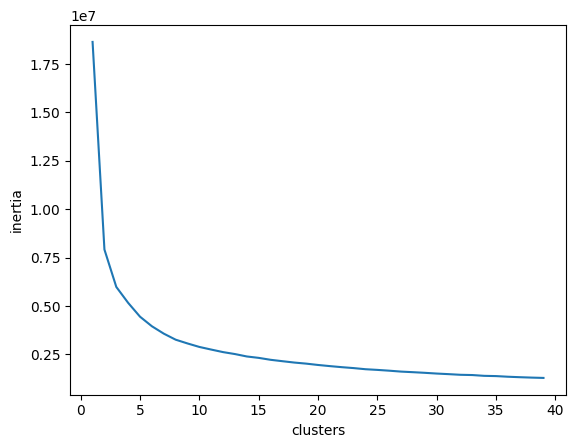

39


In [23]:
min = math.inf
best = 0
indexes = []
results = []
for i in range(1, 40):
    km = KMeans(n_clusters=i)
    model = km.fit(data)
    indexes.append(i)
    results.append(model.inertia_)
    if model.inertia_ < min:
        min = model.inertia_
        best = i
plt.xlabel("clusters")
plt.ylabel("inertia")
plt.plot(indexes, results)
# plt.title('plotted x and y values')
plt.show()

print(best)

In [24]:
km = KMeans(n_clusters=25)
model = km.fit(data)

In [25]:
model.labels_[:25]

array([16,  5, 24,  2, 18,  6, 12,  7, 24,  7, 24, 24, 13, 16, 22, 16, 10,
        7,  8,  5, 11, 11,  1, 20,  4])

In [26]:
model.cluster_centers_

array([[1.14271490e+01, 5.70689543e-01, 5.88926020e-01, 7.96463007e-03,
        6.17473587e-02, 5.41621768e-01, 3.77663458e+00, 2.51306734e-01,
        2.89578493e+00, 4.64420843e+00, 1.05652405e-01, 2.36687671e-01,
        6.86037892e-01, 5.16463511e-01, 6.02191809e-01, 5.70296067e-01,
        5.17464920e-01, 4.73800278e-01, 5.77711338e-01, 5.78245453e-01,
        2.18718885e-01],
       [3.56316922e+01, 4.96493988e-01, 4.83171162e-01, 1.30466095e-02,
        5.64933947e-02, 4.89261002e-01, 1.13513586e+01, 2.94543213e-01,
        1.19881625e+01, 1.13037396e+01, 1.40744190e-01, 2.65913598e-01,
        6.97893483e-01, 5.56218658e-01, 6.10821168e-01, 6.14309160e-01,
        6.16156723e-01, 5.42506537e-01, 4.90427846e-01, 4.70977866e-01,
        2.74952919e-01],
       [3.77163598e+01, 5.62039718e-01, 5.93514325e-01, 5.50430000e-03,
        6.96448150e-02, 5.56669513e-01, 2.10269122e+00, 2.36433251e-01,
        2.44086402e+00, 2.22485836e+00, 1.03865182e-01, 2.36117274e-01,
        6.7532

## calculate distance to the nearest centroid

In [27]:
distances = model.transform(data)
distances


array([[14.32164143, 17.95413565, 24.72939119, ..., 14.91207339,
         9.5978628 , 27.08526184],
       [16.66525606, 22.88783398, 31.31059549, ..., 10.15708809,
         9.45486252, 32.07281163],
       [33.37510144,  9.99670944, 16.8227648 , ..., 39.20210866,
        29.21823792,  3.84937058],
       ...,
       [11.64476511, 35.78093603, 36.18179509, ..., 14.49052862,
        13.61431107, 41.45403785],
       [15.55553991, 28.69713885, 35.34840712, ...,  3.94612472,
        10.04008355, 37.49000602],
       [34.54703138,  7.48476388, 19.28573287, ..., 38.73778945,
        30.27224435,  9.45471737]])

In [28]:
distances = pd.DataFrame(distances.min(axis=1).round(5), columns=['dist'])
distances

,dist
0,4.09579
1,5.17194
2,3.84937
3,3.04415
4,7.38671
...,...
69994,5.04184
69995,2.99526
69996,8.30378
69997,3.94612


In [29]:
sorted_distances = distances.sort_values(by=['dist'], ascending=False)
sorted_distances

,dist
22673,12.96738
38850,12.96002
47684,12.88429
51594,12.58924
58813,12.49349
...,...
12177,0.68144
67596,0.67009
63041,0.61793
10398,0.61611


In [30]:
initial_lengh = len(data)
print(f'initial size of data {initial_lengh}')
must_deleted = sorted_distances[sorted_distances['dist'] > 9]
print(f'number of lines removed {len(must_deleted)}')
print(f'removed percentage {len(must_deleted) / initial_lengh * 100}')

must_deleted


initial size of data 69999
number of lines removed 1181
removed percentage 1.6871669595279932


,dist
22673,12.96738
38850,12.96002
47684,12.88429
51594,12.58924
58813,12.49349
...,...
25011,9.00986
44462,9.00984
60756,9.00963
11328,9.00241


# Part e

In [45]:
temp_data = data.copy()

train_data = temp_data.sample(frac=0.7)
temp_data = temp_data.drop(train_data.index)

test_data = temp_data.sample(frac=0.6666)
validation_data = temp_data.drop(test_data.index)

print(f'data length : {len(data)}  \n'
      f'train data length : {len(train_data)}  --- %{len(train_data) / len(data) * 100} \n'
      f'test data length : {len(test_data)}  --- %{len(test_data) / len(data) * 100}\n'
      f'validation data length : {len(validation_data)} --- %{len(validation_data) / len(data) * 100}')




data length : 69999  
train data length : 48999  --- %69.9995714224489 
test data length : 13999  --- %19.99885712653038
validation data length : 7001 --- %10.001571451020729


# Q2

In [46]:
train_data.shape

(48999, 21)

In [47]:
train_data.head(5)

,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,...,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax,FireAlarm
37069,34,0.662531,0.798464,0.000000,0.199536,0.531903,11,0.218750,4,4,...,0.132530,0.77,0.32,0.544702,0.476898,0.554677,0.500526,0.666667,0.815534,0
44223,9,0.235732,0.535509,0.000000,0.032483,0.531903,1,0.203125,10,4,...,0.108434,0.70,0.26,0.855960,0.793729,0.000000,0.500526,0.406926,0.537864,0
51928,31,0.473945,0.472169,0.001489,0.025522,0.286713,14,0.187500,3,13,...,0.132530,0.87,0.62,0.726821,0.724422,0.875000,0.777778,0.478355,0.464078,0
66280,46,0.570720,0.641075,0.000000,0.063293,0.531903,9,0.367188,9,10,...,0.397590,0.58,0.52,0.571192,0.537954,0.554677,0.500526,0.623377,0.600000,0
26010,27,0.627792,0.481766,0.005957,0.041763,0.531903,13,0.257502,10,8,...,0.289157,0.67,0.57,0.559603,0.590759,0.750000,0.500526,0.554113,0.456311,0


In [48]:
train_data_y = train_data['FireAlarm']
train_data_x = train_data.drop(['FireAlarm'], axis=1)

test_data_y = test_data['FireAlarm']
test_data_x = test_data.drop(['FireAlarm'], axis=1)

validation_data_y = validation_data['FireAlarm']
validation_data_x = validation_data.drop(['FireAlarm'], axis=1)


In [49]:
print(train_data_y.head(5))

37069    0
44223    0
51928    0
66280    0
26010    0
Name: FireAlarm, dtype: int32


In [50]:
train_data_x

,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,H2-Sensor1,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax
37069,34,0.662531,0.798464,0.000000,0.199536,0.531903,11,0.218750,4,4,0.030769,0.132530,0.77,0.32,0.544702,0.476898,0.554677,0.500526,0.666667,0.815534
44223,9,0.235732,0.535509,0.000000,0.032483,0.531903,1,0.203125,10,4,0.069231,0.108434,0.70,0.26,0.855960,0.793729,0.000000,0.500526,0.406926,0.537864
51928,31,0.473945,0.472169,0.001489,0.025522,0.286713,14,0.187500,3,13,0.000000,0.132530,0.87,0.62,0.726821,0.724422,0.875000,0.777778,0.478355,0.464078
66280,46,0.570720,0.641075,0.000000,0.063293,0.531903,9,0.367188,9,10,0.169231,0.397590,0.58,0.52,0.571192,0.537954,0.554677,0.500526,0.623377,0.600000
26010,27,0.627792,0.481766,0.005957,0.041763,0.531903,13,0.257502,10,8,0.200000,0.289157,0.67,0.57,0.559603,0.590759,0.750000,0.500526,0.554113,0.456311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47601,45,0.327543,0.433781,0.008592,0.063293,0.531903,7,0.164062,7,13,0.153846,0.072289,0.87,0.45,0.764901,0.740924,0.554677,0.500526,0.339827,0.434951
21118,9,0.568238,0.554702,0.012658,0.032483,0.503497,0,0.304688,9,3,0.084615,0.132530,0.85,0.47,0.569536,0.574257,0.875000,0.222222,0.482684,0.545631
36779,5,0.136476,0.324376,0.000000,0.063293,0.531903,8,0.078125,2,8,0.015385,0.132530,0.99,0.66,0.761589,0.742574,1.000000,0.666667,0.134199,0.333981
48011,22,0.372208,0.380038,0.004468,0.063293,0.531903,13,0.234375,3,14,0.130769,0.265060,0.97,0.64,0.771523,0.785479,1.000000,0.888889,0.365801,0.370874


In [37]:
model = tf.keras.Sequential([
    # dense layer 1
    Dense(20, activation='linear'),

    # dense layer 2
    Dense(1, activation='linear')
])

model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy())
model.fit(train_data_x, train_data_y, epochs=100)

Epoch 1/100
1532/1532 [==============================] - 1s 581us/step - loss: 3.4325
Epoch 2/100
1532/1532 [==============================] - 1s 579us/step - loss: 3.4128
Epoch 3/100
1532/1532 [==============================] - 1s 568us/step - loss: 3.4128
Epoch 4/100
1532/1532 [==============================] - 1s 570us/step - loss: 3.4128
Epoch 5/100
1532/1532 [==============================] - 1s 580us/step - loss: 3.4128
Epoch 6/100
1532/1532 [==============================] - 1s 575us/step - loss: 3.4128
Epoch 7/100
1532/1532 [==============================] - 1s 584us/step - loss: 3.4128
Epoch 8/100
1532/1532 [==============================] - 1s 572us/step - loss: 3.4128
Epoch 9/100
1532/1532 [==============================] - 1s 573us/step - loss: 3.4128
Epoch 10/100
1532/1532 [==============================] - 1s 571us/step - loss: 3.4128
Epoch 11/100
1532/1532 [==============================] - 1s 578us/step - loss: 3.4128
Epoch 12/100
1532/1532 [============================

In [38]:
# eval_res = model.evaluate(train_data_x, train_data_y, verbose=0)
# print(eval_res)

In [55]:
def convert_to_binary_prediction(predictions):
    res = []
    for i in range(len(predictions)):
        if predictions[i] > 0.5:
            res.append(1)
        else:
            res.append(0)
    return np.array(res)

In [40]:
predictions_y = convert_to_binary_prediction(model.predict(train_data_x))
accuracy = accuracy_score(predictions_y, train_data_y)
print(f'accuracy in train {accuracy}')

1532/1532 [==============================] - 1s 429us/step
accuracy in train 0.7787505867466683


In [41]:
predictions_y = convert_to_binary_prediction(model.predict(test_data_x))
accuracy = accuracy_score(predictions_y, test_data_y)
print(f'accuracy in test {accuracy}')

438/438 [==============================] - 0s 427us/step
accuracy in test 0.7922708764911779


In [42]:
predictions_y = convert_to_binary_prediction(model.predict(validation_data_x))
accuracy = accuracy_score(predictions_y, validation_data_y)
print(f'accuracy in validation {accuracy}')

219/219 [==============================] - 0s 474us/step
accuracy in validation 0.7834595057848879


# Q3

In [43]:
my_models = {
    'epochs': [20, 50],
    'Neurons': [3, 5, 8, 10, 15, 20]
}


## Train all possible 3 layer NNs

In [44]:
def calculate_my_models(my_models):
    models_result = {}
    for epoch_num in my_models['epochs']:
        for neuron_num in my_models['Neurons']:
            model = tf.keras.Sequential([
                # dense layer 1
                Dense(20, activation='sigmoid'),

                Dense(neuron_num, activation='sigmoid'),

                Dense(1, activation='linear')
            ])

            model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy())
            model.fit(train_data_x, train_data_y, epochs=epoch_num)

            predictions_y = convert_to_binary_prediction(model.predict(validation_data_x))
            accuracy = accuracy_score(predictions_y, validation_data_y)

            models_result[(epoch_num, neuron_num)] = accuracy
    return models_result


In [45]:
models_result = calculate_my_models(my_models)


Epoch 1/20
1532/1532 [==============================] - 1s 611us/step - loss: 3.4128
Epoch 2/20
1532/1532 [==============================] - 1s 614us/step - loss: 3.4128
Epoch 3/20
1532/1532 [==============================] - 1s 609us/step - loss: 3.4128
Epoch 4/20
1532/1532 [==============================] - 1s 614us/step - loss: 3.4128
Epoch 5/20
1532/1532 [==============================] - 1s 590us/step - loss: 3.4128
Epoch 6/20
1532/1532 [==============================] - 1s 611us/step - loss: 3.4128
Epoch 7/20
1532/1532 [==============================] - 1s 603us/step - loss: 3.4128
Epoch 8/20
1532/1532 [==============================] - 1s 608us/step - loss: 3.4128
Epoch 9/20
1532/1532 [==============================] - 1s 607us/step - loss: 3.4128
Epoch 10/20
1532/1532 [==============================] - 1s 612us/step - loss: 3.4128
Epoch 11/20
1532/1532 [==============================] - 1s 597us/step - loss: 3.4128
Epoch 12/20
1532/1532 [==============================] - 1s 607

In [46]:
models_result

{(20, 3): 0.7834595057848879,
 (20, 5): 0.7834595057848879,
 (20, 8): 0.7834595057848879,
 (20, 10): 0.7834595057848879,
 (20, 15): 0.8314526496214827,
 (20, 20): 0.8263105270675618,
 (50, 3): 0.8463076703328096,
 (50, 5): 0.7834595057848879,
 (50, 8): 0.7791744036566205,
 (50, 10): 0.21654049421511212,
 (50, 15): 0.8395943436651907,
 (50, 20): 0.7834595057848879}


## Final model

In [47]:
import keras

In [67]:
model = tf.keras.Sequential([
    # dense layer 1
    Dense(20, activation='sigmoid'),

    Dense(8, activation='sigmoid'),

    Dense(1, activation='linear')
])

model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(train_data_x, train_data_y, epochs=50, validation_split=0.1)

Epoch 1/50
1379/1379 [==============================] - 1s 777us/step - loss: 0.4845 - accuracy: 0.7843 - val_loss: 0.4398 - val_accuracy: 0.8102
Epoch 2/50
1379/1379 [==============================] - 1s 746us/step - loss: 0.4376 - accuracy: 0.8044 - val_loss: 0.4246 - val_accuracy: 0.8157
Epoch 3/50
1379/1379 [==============================] - 1s 747us/step - loss: 0.4236 - accuracy: 0.8178 - val_loss: 0.4658 - val_accuracy: 0.8129
Epoch 4/50
1379/1379 [==============================] - 1s 736us/step - loss: 0.4260 - accuracy: 0.8163 - val_loss: 0.4100 - val_accuracy: 0.8167
Epoch 5/50
1379/1379 [==============================] - 1s 733us/step - loss: 0.4777 - accuracy: 0.8024 - val_loss: 0.4548 - val_accuracy: 0.7947
Epoch 6/50
1379/1379 [==============================] - 1s 755us/step - loss: 0.4165 - accuracy: 0.8166 - val_loss: 0.4072 - val_accuracy: 0.8178
Epoch 7/50
1379/1379 [==============================] - 1s 729us/step - loss: 0.4109 - accuracy: 0.8176 - val_loss: 0.4050 -

In [68]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

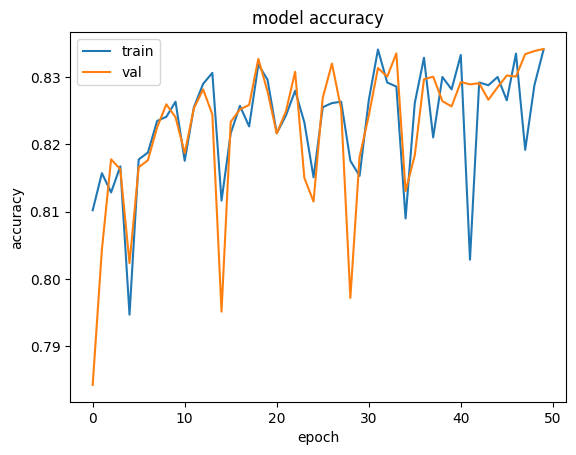

In [69]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

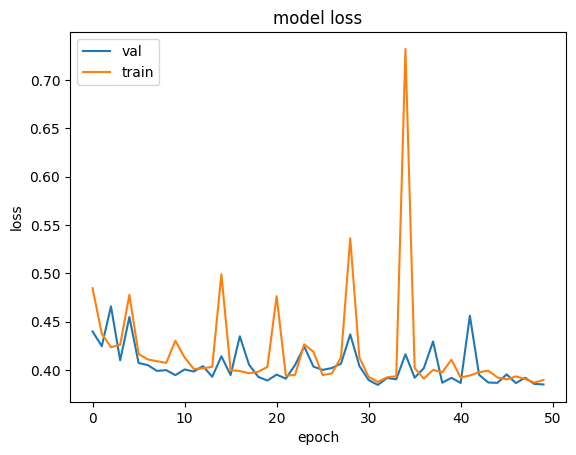

In [72]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','train'], loc='upper left')
plt.show()

# Q4

In [51]:
def test_model_with_activation_functions(activation_function, epochs=50):
    model = tf.keras.Sequential([
        # dense layer 1
        Dense(20, activation=activation_function),

        Dense(8, activation=activation_function),

        Dense(1, activation=activation_function)
    ])

    model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
    history = model.fit(train_data_x, train_data_y, epochs=epochs, validation_split=0.1)

    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['accuracy'])
    plt.title(f'model accuracy for {activation_function}')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['val','train'], loc='upper left')
    plt.show()

    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title(f'model loss for {activation_function}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['val','train'], loc='upper left')
    plt.show()


Epoch 1/50
1379/1379 [==============================] - 1s 767us/step - loss: 2.5356 - accuracy: 0.7096 - val_loss: 3.2746 - val_accuracy: 0.7808
Epoch 2/50
1379/1379 [==============================] - 1s 702us/step - loss: 2.3869 - accuracy: 0.7604 - val_loss: 2.4219 - val_accuracy: 0.7678
Epoch 3/50
1379/1379 [==============================] - 1s 690us/step - loss: 0.8189 - accuracy: 0.7753 - val_loss: 0.5461 - val_accuracy: 0.7798
Epoch 4/50
1379/1379 [==============================] - 1s 694us/step - loss: 0.5310 - accuracy: 0.7822 - val_loss: 0.5301 - val_accuracy: 0.7810
Epoch 5/50
1379/1379 [==============================] - 1s 697us/step - loss: 0.5267 - accuracy: 0.7818 - val_loss: 0.5259 - val_accuracy: 0.7808
Epoch 6/50
1379/1379 [==============================] - 1s 716us/step - loss: 0.5244 - accuracy: 0.7823 - val_loss: 0.5242 - val_accuracy: 0.7810
Epoch 7/50
1379/1379 [==============================] - 1s 689us/step - loss: 0.5251 - accuracy: 0.7823 - val_loss: 0.5260 -

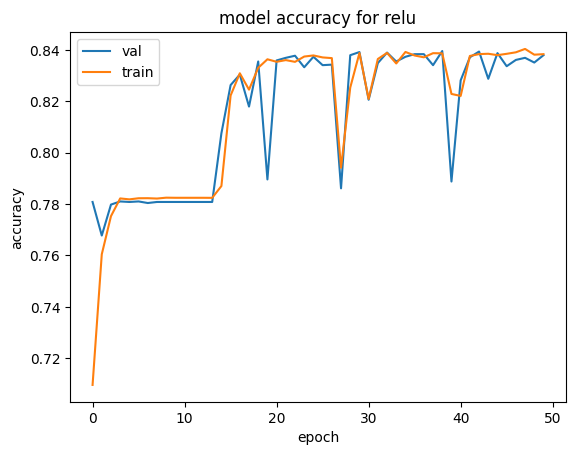

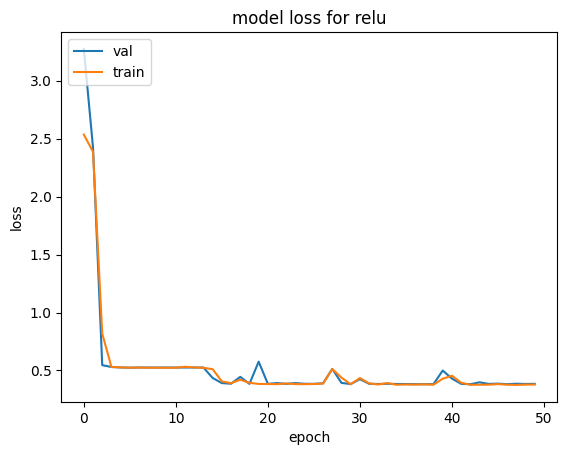

In [52]:
test_model_with_activation_functions('relu')

Epoch 1/50
1379/1379 [==============================] - 1s 748us/step - loss: 0.4924 - accuracy: 0.7820 - val_loss: 0.4294 - val_accuracy: 0.7908
Epoch 2/50
1379/1379 [==============================] - 1s 707us/step - loss: 0.4011 - accuracy: 0.8210 - val_loss: 0.3863 - val_accuracy: 0.8255
Epoch 3/50
1379/1379 [==============================] - 1s 712us/step - loss: 0.3821 - accuracy: 0.8331 - val_loss: 0.3752 - val_accuracy: 0.8327
Epoch 4/50
1379/1379 [==============================] - 1s 709us/step - loss: 0.3759 - accuracy: 0.8361 - val_loss: 0.3713 - val_accuracy: 0.8380
Epoch 5/50
1379/1379 [==============================] - 1s 709us/step - loss: 0.3733 - accuracy: 0.8372 - val_loss: 0.3695 - val_accuracy: 0.8392
Epoch 6/50
1379/1379 [==============================] - 1s 706us/step - loss: 0.3716 - accuracy: 0.8380 - val_loss: 0.3686 - val_accuracy: 0.8384
Epoch 7/50
1379/1379 [==============================] - 1s 716us/step - loss: 0.3705 - accuracy: 0.8380 - val_loss: 0.3669 -

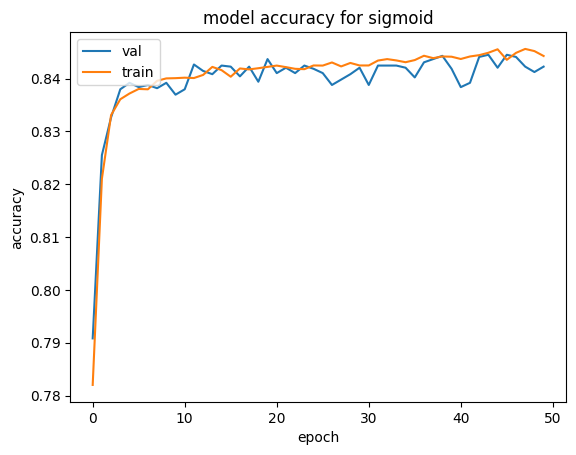

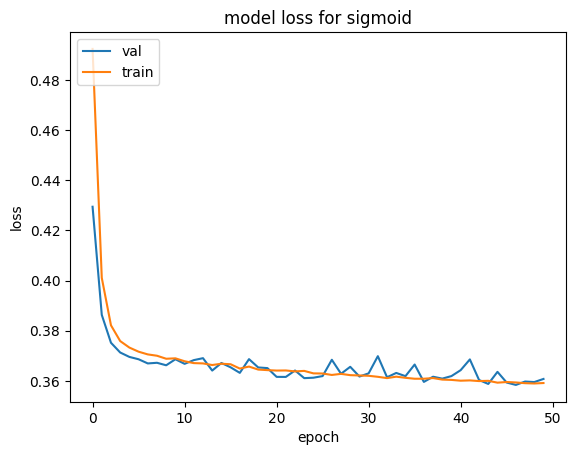

In [41]:
test_model_with_activation_functions('sigmoid')

Epoch 1/50
1379/1379 [==============================] - 1s 737us/step - loss: 0.5580 - accuracy: 0.7651 - val_loss: 0.4984 - val_accuracy: 0.7898
Epoch 2/50
1379/1379 [==============================] - 1s 676us/step - loss: 0.4849 - accuracy: 0.7809 - val_loss: 0.4319 - val_accuracy: 0.8020
Epoch 3/50
1379/1379 [==============================] - 1s 674us/step - loss: 0.4558 - accuracy: 0.7897 - val_loss: 0.4234 - val_accuracy: 0.8073
Epoch 4/50
1379/1379 [==============================] - 1s 670us/step - loss: 0.4308 - accuracy: 0.8073 - val_loss: 0.4239 - val_accuracy: 0.8184
Epoch 5/50
1379/1379 [==============================] - 1s 673us/step - loss: 0.4135 - accuracy: 0.8209 - val_loss: 0.3978 - val_accuracy: 0.8263
Epoch 6/50
1379/1379 [==============================] - 1s 683us/step - loss: 0.3977 - accuracy: 0.8299 - val_loss: 0.3906 - val_accuracy: 0.8239
Epoch 7/50
1379/1379 [==============================] - 1s 668us/step - loss: 0.3907 - accuracy: 0.8314 - val_loss: 0.3774 -

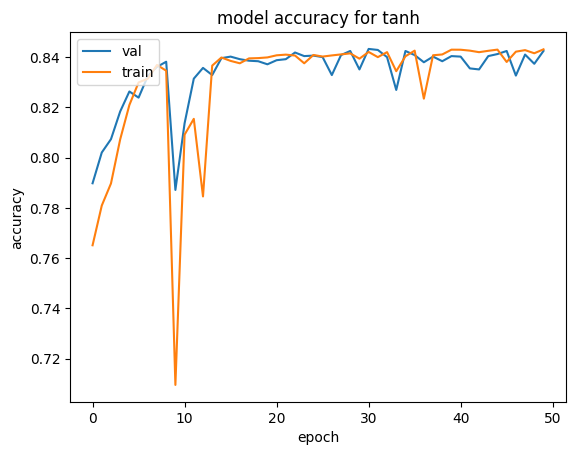

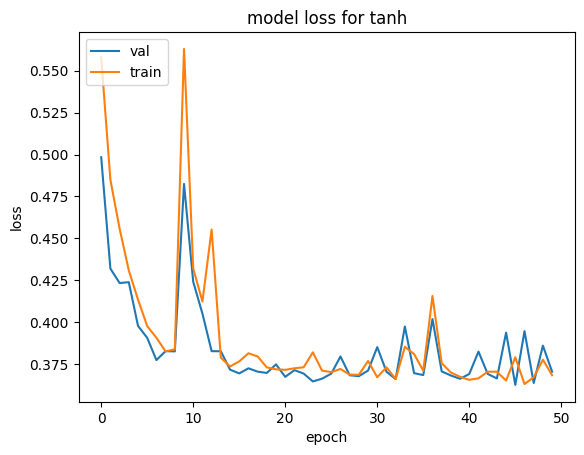

In [42]:
test_model_with_activation_functions('tanh')

## suggested model

Epoch 1/50
1379/1379 [==============================] - 1s 753us/step - loss: 0.4794 - accuracy: 0.7926 - val_loss: 0.4162 - val_accuracy: 0.8112
Epoch 2/50
1379/1379 [==============================] - 1s 684us/step - loss: 0.3949 - accuracy: 0.8240 - val_loss: 0.3902 - val_accuracy: 0.8267
Epoch 3/50
1379/1379 [==============================] - 1s 726us/step - loss: 0.3804 - accuracy: 0.8323 - val_loss: 0.3818 - val_accuracy: 0.8290
Epoch 4/50
1379/1379 [==============================] - 1s 679us/step - loss: 0.3756 - accuracy: 0.8349 - val_loss: 0.3833 - val_accuracy: 0.8335
Epoch 5/50
1379/1379 [==============================] - 1s 676us/step - loss: 0.3739 - accuracy: 0.8366 - val_loss: 0.3797 - val_accuracy: 0.8324
Epoch 6/50
1379/1379 [==============================] - 1s 679us/step - loss: 0.3718 - accuracy: 0.8379 - val_loss: 0.3820 - val_accuracy: 0.8306
Epoch 7/50
1379/1379 [==============================] - 1s 671us/step - loss: 0.3714 - accuracy: 0.8383 - val_loss: 0.3775 -

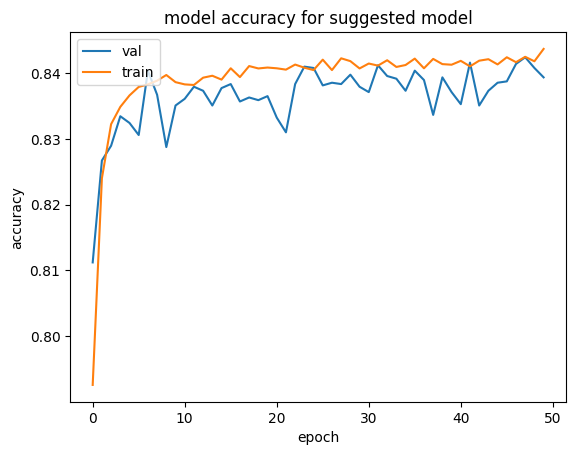

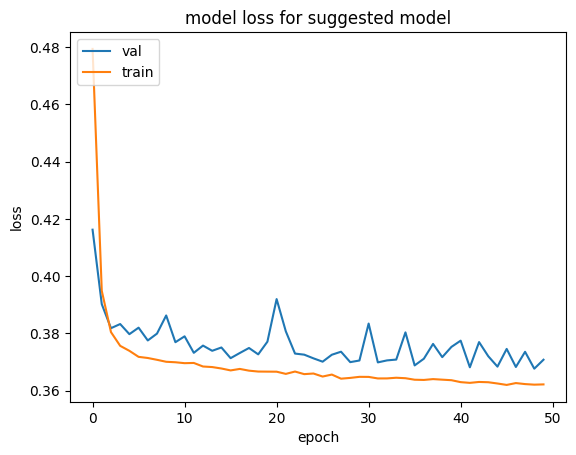

In [53]:
model = tf.keras.Sequential([
    # dense layer 1
    Dense(20, activation='relu'),

    Dense(8, activation='relu'),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(train_data_x, train_data_y, epochs=50, validation_split=0.1)

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title(f'model accuracy for suggested model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val','train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title(f'model loss for suggested model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','train'], loc='upper left')
plt.show()

# Q5 (first 5)

In [78]:
def check_batch_impact(batch):
    model = tf.keras.Sequential([
        # dense layer 1
        Dense(20, activation='relu'),

        Dense(8, activation='relu'),

        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
    history = model.fit(train_data_x, train_data_y, epochs=50, validation_split=0.1, batch_size=batch)

    pred = model.predict(test_data_x)
    pred = convert_to_binary_prediction(pred)

    # Evaluating confusion matrix
    res = tf.math.confusion_matrix(test_data_y, pred)

    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['accuracy'])
    plt.title(f'model accuracy with batch {batch}')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['val','train'], loc='upper left')
    plt.show()

    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title(f'model loss with batch {batch}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['val','train'], loc='upper left')
    plt.show()

    # Printing the result
    print("*************")
    acc = accuracy_score(test_data_y, pred)
    print(f'accuracy  : {acc}')
    print('Confusion_matrix: ', res)
    print("***********")

Epoch 1/50
5513/5513 [==============================] - 4s 741us/step - loss: 0.4420 - accuracy: 0.8036 - val_loss: 0.4323 - val_accuracy: 0.7988
Epoch 2/50
5513/5513 [==============================] - 4s 690us/step - loss: 0.3893 - accuracy: 0.8272 - val_loss: 0.3847 - val_accuracy: 0.8302
Epoch 3/50
5513/5513 [==============================] - 4s 693us/step - loss: 0.3831 - accuracy: 0.8319 - val_loss: 0.3786 - val_accuracy: 0.8314
Epoch 4/50
5513/5513 [==============================] - 4s 704us/step - loss: 0.3806 - accuracy: 0.8334 - val_loss: 0.3780 - val_accuracy: 0.8359
Epoch 5/50
5513/5513 [==============================] - 4s 724us/step - loss: 0.3800 - accuracy: 0.8332 - val_loss: 0.3820 - val_accuracy: 0.8320
Epoch 6/50
5513/5513 [==============================] - 4s 720us/step - loss: 0.3776 - accuracy: 0.8355 - val_loss: 0.4175 - val_accuracy: 0.8031
Epoch 7/50
5513/5513 [==============================] - 4s 714us/step - loss: 0.3775 - accuracy: 0.8348 - val_loss: 0.3775 -

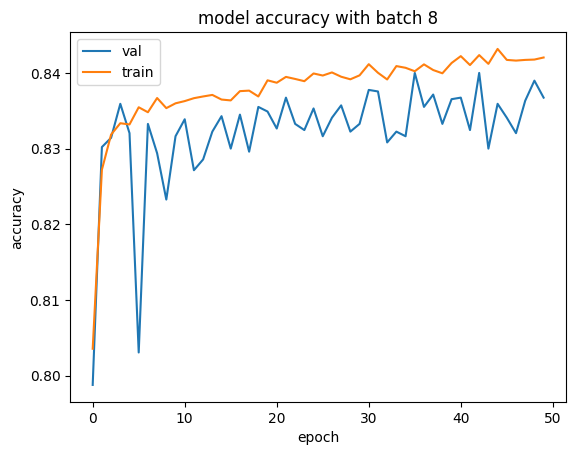

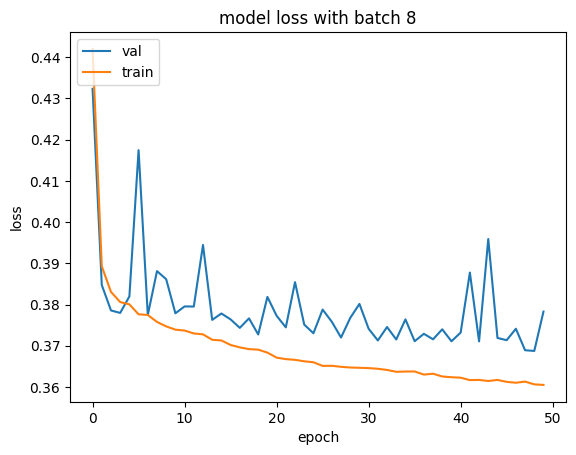

*************
accuracy  : 0.8507036216872633
Confusion_matrix:  tf.Tensor(
[[10659   432]
 [ 1658  1250]], shape=(2, 2), dtype=int32)
***********


In [85]:
check_batch_impact(8)

Epoch 1/50
2757/2757 [==============================] - 2s 738us/step - loss: 0.4704 - accuracy: 0.7908 - val_loss: 0.4071 - val_accuracy: 0.8214
Epoch 2/50
2757/2757 [==============================] - 2s 693us/step - loss: 0.3908 - accuracy: 0.8259 - val_loss: 0.3872 - val_accuracy: 0.8294
Epoch 3/50
2757/2757 [==============================] - 2s 703us/step - loss: 0.3820 - accuracy: 0.8315 - val_loss: 0.3891 - val_accuracy: 0.8237
Epoch 4/50
2757/2757 [==============================] - 2s 695us/step - loss: 0.3788 - accuracy: 0.8327 - val_loss: 0.3811 - val_accuracy: 0.8286
Epoch 5/50
2757/2757 [==============================] - 2s 695us/step - loss: 0.3771 - accuracy: 0.8336 - val_loss: 0.3916 - val_accuracy: 0.8300
Epoch 6/50
2757/2757 [==============================] - 2s 701us/step - loss: 0.3763 - accuracy: 0.8356 - val_loss: 0.3803 - val_accuracy: 0.8314
Epoch 7/50
2757/2757 [==============================] - 2s 694us/step - loss: 0.3750 - accuracy: 0.8349 - val_loss: 0.3830 -

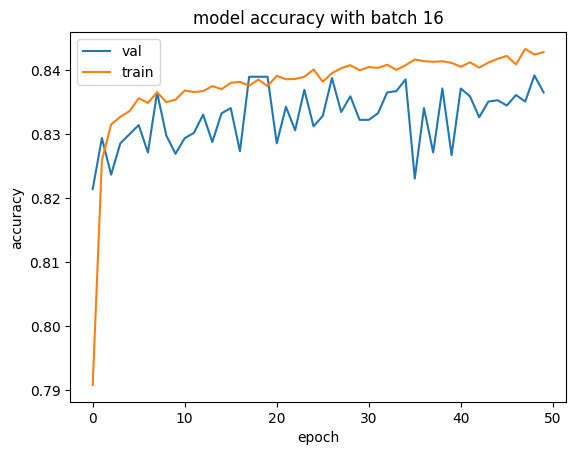

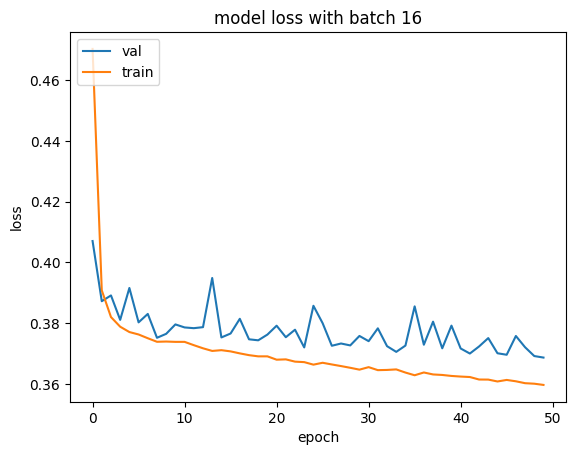

*************
accuracy  : 0.8489177798414173
Confusion_matrix:  tf.Tensor(
[[10601   490]
 [ 1625  1283]], shape=(2, 2), dtype=int32)
***********


In [86]:
check_batch_impact(16)

Epoch 1/50
1379/1379 [==============================] - 1s 796us/step - loss: 0.4937 - accuracy: 0.7887 - val_loss: 0.4266 - val_accuracy: 0.8155
Epoch 2/50
1379/1379 [==============================] - 1s 820us/step - loss: 0.4045 - accuracy: 0.8180 - val_loss: 0.3951 - val_accuracy: 0.8245
Epoch 3/50
1379/1379 [==============================] - 1s 847us/step - loss: 0.3879 - accuracy: 0.8284 - val_loss: 0.3840 - val_accuracy: 0.8290
Epoch 4/50
1379/1379 [==============================] - 1s 822us/step - loss: 0.3823 - accuracy: 0.8319 - val_loss: 0.3862 - val_accuracy: 0.8290
Epoch 5/50
1379/1379 [==============================] - 1s 841us/step - loss: 0.3813 - accuracy: 0.8331 - val_loss: 0.3998 - val_accuracy: 0.8255
Epoch 6/50
1379/1379 [==============================] - 1s 819us/step - loss: 0.3784 - accuracy: 0.8340 - val_loss: 0.3898 - val_accuracy: 0.8282
Epoch 7/50
1379/1379 [==============================] - 1s 839us/step - loss: 0.3784 - accuracy: 0.8337 - val_loss: 0.3774 -

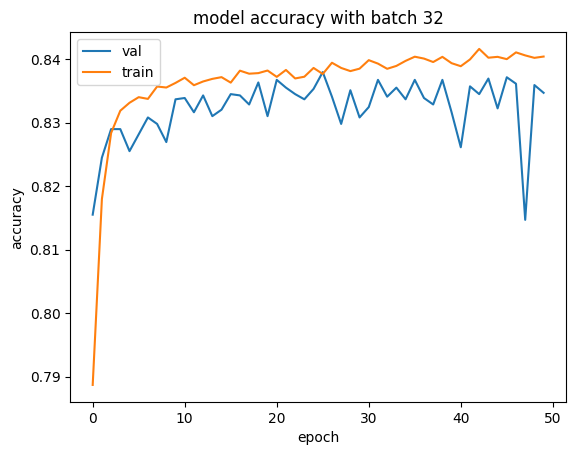

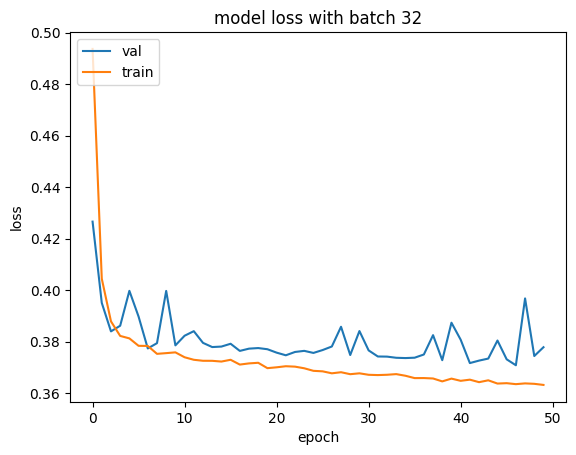

*************
accuracy  : 0.8491320808629188
Confusion_matrix:  tf.Tensor(
[[10679   412]
 [ 1700  1208]], shape=(2, 2), dtype=int32)
***********


In [87]:
check_batch_impact(32)

Epoch 1/50
690/690 [==============================] - 1s 935us/step - loss: 0.5536 - accuracy: 0.7756 - val_loss: 0.4353 - val_accuracy: 0.8012
Epoch 2/50
690/690 [==============================] - 1s 770us/step - loss: 0.4104 - accuracy: 0.8147 - val_loss: 0.3987 - val_accuracy: 0.8214
Epoch 3/50
690/690 [==============================] - 1s 766us/step - loss: 0.3894 - accuracy: 0.8265 - val_loss: 0.3833 - val_accuracy: 0.8310
Epoch 4/50
690/690 [==============================] - 1s 756us/step - loss: 0.3817 - accuracy: 0.8309 - val_loss: 0.3879 - val_accuracy: 0.8292
Epoch 5/50
690/690 [==============================] - 1s 777us/step - loss: 0.3794 - accuracy: 0.8329 - val_loss: 0.3786 - val_accuracy: 0.8365
Epoch 6/50
690/690 [==============================] - 1s 762us/step - loss: 0.3777 - accuracy: 0.8337 - val_loss: 0.3808 - val_accuracy: 0.8294
Epoch 7/50
690/690 [==============================] - 1s 773us/step - loss: 0.3768 - accuracy: 0.8353 - val_loss: 0.3775 - val_accuracy:

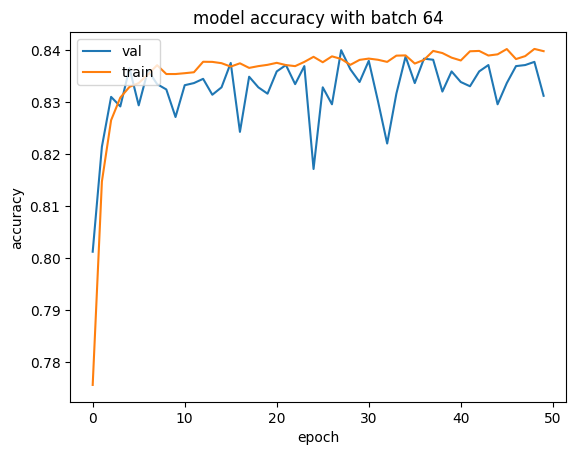

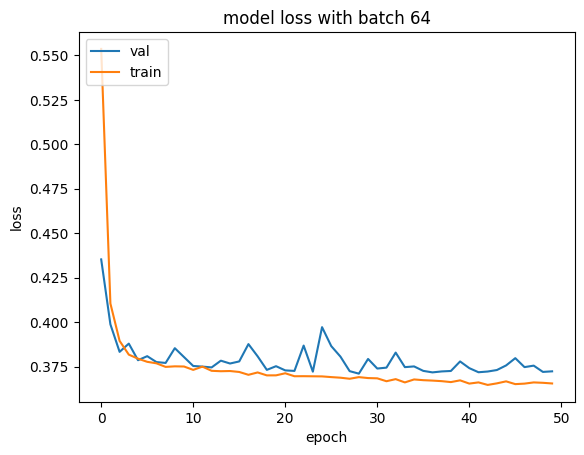

*************
accuracy  : 0.8469176369740695
Confusion_matrix:  tf.Tensor(
[[10293   798]
 [ 1345  1563]], shape=(2, 2), dtype=int32)
***********


In [84]:
check_batch_impact(64)

Epoch 1/50
345/345 [==============================] - 1s 1ms/step - loss: 0.5700 - accuracy: 0.7542 - val_loss: 0.5004 - val_accuracy: 0.7751
Epoch 2/50
345/345 [==============================] - 0s 796us/step - loss: 0.4555 - accuracy: 0.7906 - val_loss: 0.4247 - val_accuracy: 0.8092
Epoch 3/50
345/345 [==============================] - 0s 782us/step - loss: 0.4077 - accuracy: 0.8163 - val_loss: 0.3996 - val_accuracy: 0.8220
Epoch 4/50
345/345 [==============================] - 0s 825us/step - loss: 0.3917 - accuracy: 0.8249 - val_loss: 0.3935 - val_accuracy: 0.8237
Epoch 5/50
345/345 [==============================] - 0s 815us/step - loss: 0.3838 - accuracy: 0.8291 - val_loss: 0.3869 - val_accuracy: 0.8278
Epoch 6/50
345/345 [==============================] - 0s 851us/step - loss: 0.3803 - accuracy: 0.8316 - val_loss: 0.3883 - val_accuracy: 0.8280
Epoch 7/50
345/345 [==============================] - 0s 785us/step - loss: 0.3802 - accuracy: 0.8330 - val_loss: 0.3798 - val_accuracy: 0

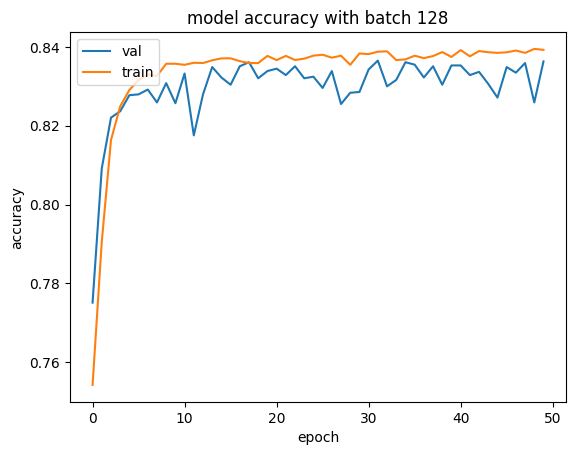

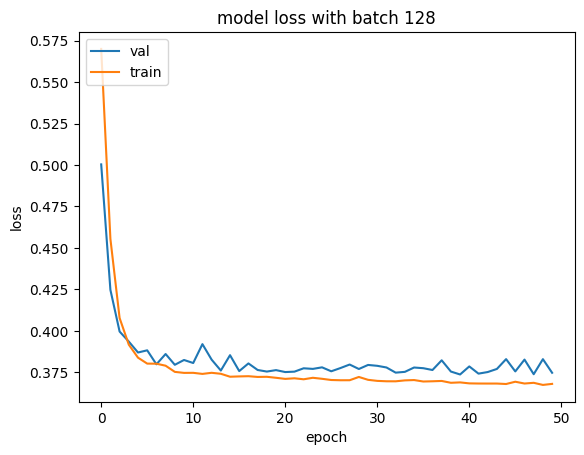

*************
accuracy  : 0.8481320094292449
Confusion_matrix:  tf.Tensor(
[[10574   517]
 [ 1609  1299]], shape=(2, 2), dtype=int32)
***********


In [79]:
check_batch_impact(128)

# Q5 _ second time

first_try

Epoch 1/500
690/690 [==============================] - 1s 945us/step - loss: 0.5032 - accuracy: 0.7787 - val_loss: 0.4270 - val_accuracy: 0.8035
Epoch 2/500
690/690 [==============================] - 1s 823us/step - loss: 0.4055 - accuracy: 0.8170 - val_loss: 0.4095 - val_accuracy: 0.8200
Epoch 3/500
690/690 [==============================] - 1s 806us/step - loss: 0.3894 - accuracy: 0.8277 - val_loss: 0.3871 - val_accuracy: 0.8239
Epoch 4/500
690/690 [==============================] - 1s 786us/step - loss: 0.3810 - accuracy: 0.8310 - val_loss: 0.3832 - val_accuracy: 0.8329
Epoch 5/500
690/690 [==============================] - 1s 792us/step - loss: 0.3804 - accuracy: 0.8342 - val_loss: 0.3876 - val_accuracy: 0.8324
Epoch 6/500
690/690 [==============================] - 1s 789us/step - loss: 0.3784 - accuracy: 0.8346 - val_loss: 0.3846 - val_accuracy: 0.8331
Epoch 7/500
690/690 [==============================] - 1s 787us/step - loss: 0.3757 - accuracy: 0.8349 - val_loss: 0.3857 - val_ac

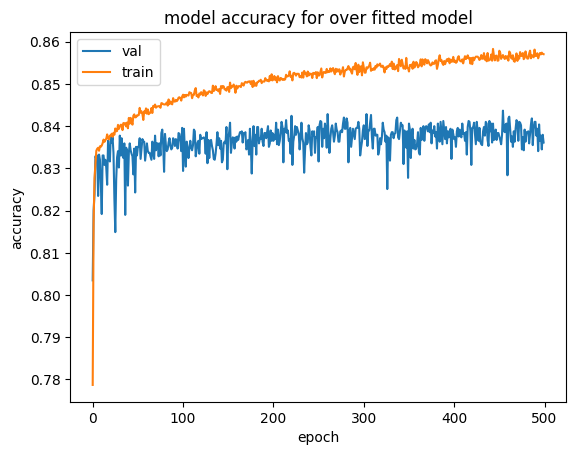

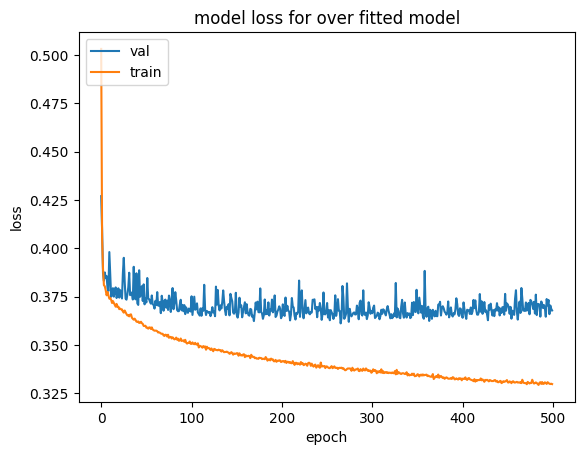

*************
accuracy  : 0.8489892135152511
Confusion_matrix:  tf.Tensor(
[[10234   857]
 [ 1257  1651]], shape=(2, 2), dtype=int32)
***********


In [82]:
batch = 64
model = tf.keras.Sequential([
    # dense layer 1
    Dense(20, activation='relu'),

    Dense(50, activation='relu'),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(train_data_x, train_data_y, epochs=500, validation_split=0.1, batch_size=batch)

pred = model.predict(test_data_x)
pred = convert_to_binary_prediction(pred)

# Evaluating confusion matrix
res = tf.math.confusion_matrix(test_data_y, pred)

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title(f'model accuracy for over fitted model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val','train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title(f'model loss for over fitted model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','train'], loc='upper left')
plt.show()

# Printing the result
print("*************")
acc = accuracy_score(test_data_y, pred)
print(f'accuracy  : {acc}')
print('Confusion_matrix: ', res)
print("***********")

try 2

Epoch 1/400
690/690 [==============================] - 1s 1ms/step - loss: 0.4546 - accuracy: 0.7994 - val_loss: 0.5464 - val_accuracy: 0.7965
Epoch 2/400
690/690 [==============================] - 1s 1ms/step - loss: 0.4025 - accuracy: 0.8209 - val_loss: 0.3932 - val_accuracy: 0.8255
Epoch 3/400
690/690 [==============================] - 1s 1ms/step - loss: 0.3875 - accuracy: 0.8295 - val_loss: 0.3947 - val_accuracy: 0.8249
Epoch 4/400
690/690 [==============================] - 1s 1ms/step - loss: 0.3827 - accuracy: 0.8314 - val_loss: 0.3906 - val_accuracy: 0.8180
Epoch 5/400
690/690 [==============================] - 1s 1ms/step - loss: 0.3795 - accuracy: 0.8331 - val_loss: 0.4351 - val_accuracy: 0.8180
Epoch 6/400
690/690 [==============================] - 1s 1ms/step - loss: 0.3807 - accuracy: 0.8322 - val_loss: 0.3761 - val_accuracy: 0.8318
Epoch 7/400
690/690 [==============================] - 1s 1ms/step - loss: 0.3779 - accuracy: 0.8345 - val_loss: 0.3788 - val_accuracy: 0.8278

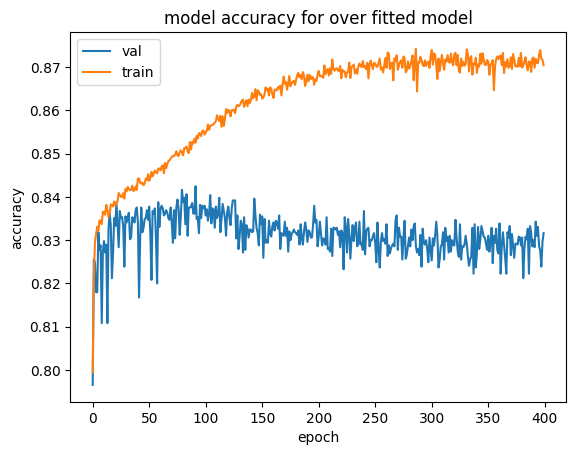

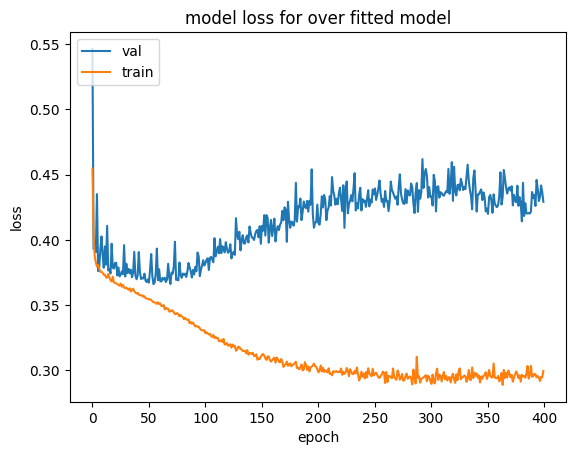

*************
accuracy  : 0.8418458461318665
Confusion_matrix:  tf.Tensor(
[[10387   704]
 [ 1510  1398]], shape=(2, 2), dtype=int32)
***********


In [83]:
batch = 64
model = tf.keras.Sequential([
    # dense layer 1
    Dense(20, activation='relu'),

    Dense(50, activation='relu'),

    Dense(75, activation='linear'),

    Dense(100, activation='tanh'),

    Dense(50, activation='relu'),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(train_data_x, train_data_y, epochs=400, validation_split=0.1, batch_size=batch)

pred = model.predict(test_data_x)
pred = convert_to_binary_prediction(pred)

# Evaluating confusion matrix
res = tf.math.confusion_matrix(test_data_y, pred)

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title(f'model accuracy for over fitted model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val','train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title(f'model loss for over fitted model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','train'], loc='upper left')
plt.show()

# Printing the result
print("*************")
acc = accuracy_score(test_data_y, pred)
print(f'accuracy  : {acc}')
print('Confusion_matrix: ', res)
print("***********")

Epoch 1/400
1379/1379 [==============================] - 6s 4ms/step - loss: 0.4417 - accuracy: 0.8077 - val_loss: 0.3924 - val_accuracy: 0.8286
Epoch 2/400
1379/1379 [==============================] - 5s 3ms/step - loss: 0.3881 - accuracy: 0.8312 - val_loss: 0.3877 - val_accuracy: 0.8294
Epoch 3/400
1379/1379 [==============================] - 5s 3ms/step - loss: 0.3818 - accuracy: 0.8332 - val_loss: 0.3915 - val_accuracy: 0.8298
Epoch 4/400
1379/1379 [==============================] - 5s 3ms/step - loss: 0.3781 - accuracy: 0.8371 - val_loss: 0.3829 - val_accuracy: 0.8347
Epoch 5/400
1379/1379 [==============================] - 5s 4ms/step - loss: 0.3740 - accuracy: 0.8379 - val_loss: 0.3758 - val_accuracy: 0.8363
Epoch 6/400
1379/1379 [==============================] - 7s 5ms/step - loss: 0.3749 - accuracy: 0.8365 - val_loss: 0.3906 - val_accuracy: 0.8290
Epoch 7/400
1379/1379 [==============================] - 6s 4ms/step - loss: 0.3736 - accuracy: 0.8375 - val_loss: 0.3913 - val_ac

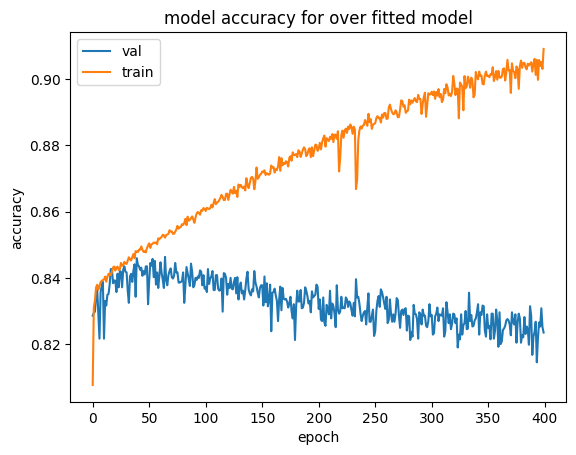

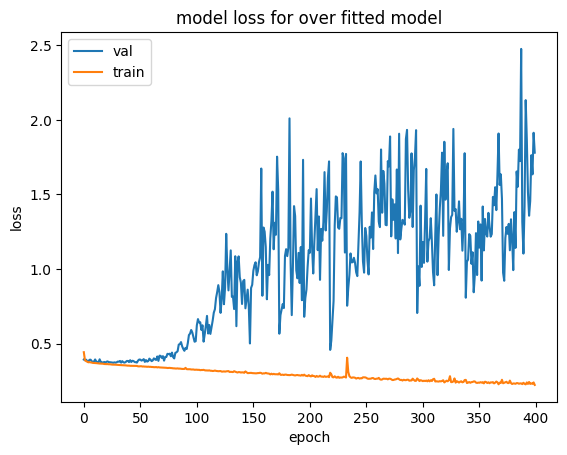

*************
accuracy  : 0.8255589684977498
Confusion_matrix:  tf.Tensor(
[[10068   848]
 [ 1594  1489]], shape=(2, 2), dtype=int32)
***********


In [58]:
batch = 32
model = tf.keras.Sequential([
    # dense layer 1
    Dense(20, activation='relu'),

    Dense(256 , activation='relu'),

    Dense(512, activation='relu'),

    Dense(512 , activation='relu'),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(train_data_x, train_data_y, epochs=400, validation_split=0.1, batch_size=batch)

pred = model.predict(test_data_x)
pred = convert_to_binary_prediction(pred)

# Evaluating confusion matrix
res = tf.math.confusion_matrix(test_data_y, pred)

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title(f'model accuracy for over fitted model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val','train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title(f'model loss for over fitted model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','train'], loc='upper left')
plt.show()

# Printing the result
print("*************")
acc = accuracy_score(test_data_y, pred)
print(f'accuracy  : {acc}')
print('Confusion_matrix: ', res)
print("***********")

# Q6

Epoch 1/300
345/345 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7695 - val_loss: 0.4808 - val_accuracy: 0.7892
Epoch 2/300
345/345 [==============================] - 0s 850us/step - loss: 0.4537 - accuracy: 0.7944 - val_loss: 0.4237 - val_accuracy: 0.8031
Epoch 3/300
345/345 [==============================] - 0s 822us/step - loss: 0.4054 - accuracy: 0.8220 - val_loss: 0.3836 - val_accuracy: 0.8278
Epoch 4/300
345/345 [==============================] - 0s 836us/step - loss: 0.3874 - accuracy: 0.8277 - val_loss: 0.3752 - val_accuracy: 0.8355
Epoch 5/300
345/345 [==============================] - 0s 835us/step - loss: 0.3789 - accuracy: 0.8326 - val_loss: 0.3891 - val_accuracy: 0.8312
Epoch 6/300
345/345 [==============================] - 0s 823us/step - loss: 0.3768 - accuracy: 0.8343 - val_loss: 0.3620 - val_accuracy: 0.8369
Epoch 7/300
345/345 [==============================] - 0s 836us/step - loss: 0.3728 - accuracy: 0.8362 - val_loss: 0.3829 - val_accu

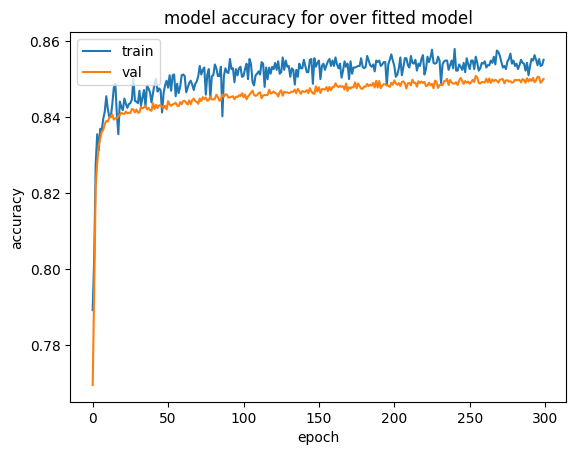

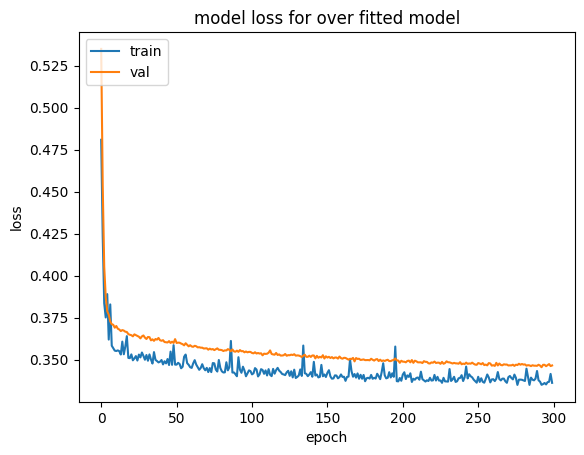

*************
accuracy  : 0.8409172083720265
Confusion_matrix:  tf.Tensor(
[[10385   521]
 [ 1706  1387]], shape=(2, 2), dtype=int32)
***********


In [175]:
model = tf.keras.Sequential([
    # dense layer 1
    Dense(20, activation='relu'),

    Dense(8, activation='relu'),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(train_data_x, train_data_y, epochs=300, validation_split=0.1, batch_size=128)

pred = model.predict(test_data_x)
pred = convert_to_binary_prediction(pred)

# Evaluating confusion matrix
res = tf.math.confusion_matrix(test_data_y, pred)

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title(f'model accuracy for over fitted model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title(f'model loss for over fitted model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

# Printing the result
print("*************")
acc = accuracy_score(test_data_y, pred)
print(f'accuracy  : {acc}')
print('Confusion_matrix: ', res)
print("***********")